# Reporting Assignment - Key
### EMAT 22110 - Data in Emerging Media and Technology
### Author: David E. Silva
### Created: 7/21/2020
### Last Updated: 7/28/2020
<img src = "https://upload.wikimedia.org/wikipedia/commons/6/67/REPORTING.png" alt = "Cheesy Business Reports">

#### Purpose
**The first assignment is technically the last step of the data loop, but correct report writing is important to practice often and perfect early. A final report will be a requirement of all future assignments. This is where you will demonstrate you have learned the basic techniques of report writing including recognizing types of data, appropriate use of common visualizations, and using evidence to support assertions. (150pts)**

Before attempting this assignment you will need to complete the Systems Check, download your personal Instagram data, and review the content from "Focus on Reporting."

To complete this assignment follow the in-class example to:
1. Open and <a href = "https://docs.python.org/3/library/json.html">load</a> the <a href="https://www.json.org/json-en.html">JSON</a> file titled "likes.json"
2. Convert the data in "likes.json" to a DataFrame object using Pandas
3. Summarize the number of likes by account using the <a href = "https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html"><code>groupby()</code></a> and <a href = "https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html"><code>count()</code></a> DataFrame methods
4. Plot the estimated distribution density, counts, and proportion of likes by account using <a href="https://seaborn.pydata.org/generated/seaborn.distplot.html"><code>seaborn.distplot()</code></a>, <a href="https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar"><code>pyplot.bar()</code></a>, and <a href="https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.pie.html#matplotlib.pyplot.pie"><code>pyplot.pie()</code></a> respectively.
(Perhaps also use the pandas options for pie and bar plots?)

Then write a complete report of the data that:
5. Provides and overview that clearly states the driving question and links the question to the data approach
6. Describe the raw data structure and data types used in the analysis
7. Documents the wrangling and analysis of the data
8. Includes a clear and appropriate visualization
9. Draws a data-driven conclusion that addresses the original question
10. Reflects on limitations, alternative approaches, and next steps

# Example

### 1. Overview
Instagram affords interactions between users in a variety of ways. The primary method of engagement is "liking" someone's post. Likes carry a variety of social meaning, but generally are associated with approval and positive reinforcement (although this action may also be motivated by social obligation or in-part manufactured by the platform design).
Likes are a low-cost engagement, meaning they do not require a substantial amount of resources or effort. As such, they are treated as disposable in most social media platforms.
Although a single like may not contain much value, a person's patterns of engagements over time provides insight otherwise obscured by the platform. This data is commonly referred to as digital trace data, that is, the markers a person leaves while online.
#### 1.1 Research Questions
1. How frequently do people like content on Instagram?
2. Are likes evenly distributed across accounts?  
3. What accounts to people most frequently like?
4. Can likes tell us about relationships between users?

### 2. Data
The data for this report comes from the "Your Instagram Data" files <a href="https://help.instagram.com/181231772500920">available for download through the user's "Privacy and Security" settings</a>. In the data dump is a file named "likes.json" which was read in and loaded to a Python 3 environment.

In [1]:
from platform import python_version

print(python_version())

3.8.3


The following packages were used in this analysis.

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
with open ("likes.json") as f:
    likes = json.load(f)

In [4]:
likes

{'media_likes': [['2020-07-11T04:39:28+00:00', 'ball_doesnt_lie'],
  ['2020-07-11T04:39:05+00:00', 'ball_doesnt_lie'],
  ['2020-07-05T17:25:44+00:00', 'ali_saurusrex'],
  ['2020-07-03T03:40:02+00:00', 'cacandassociates'],
  ['2020-06-25T17:41:50+00:00', 'cacandassociates'],
  ['2020-06-22T23:01:55+00:00', 'reams_esq'],
  ['2020-06-08T15:05:46+00:00', 'emmyr0o'],
  ['2020-06-07T12:46:29+00:00', 'ali_saurusrex'],
  ['2020-06-02T01:03:28+00:00', 'colin_storm'],
  ['2020-05-25T16:38:14+00:00', 'ali_saurusrex'],
  ['2020-05-19T23:38:40+00:00', 'colin_storm'],
  ['2020-05-18T13:42:30+00:00', 'emmyr0o'],
  ['2020-05-14T13:51:03+00:00', 'emmyr0o'],
  ['2020-05-12T21:31:12+00:00', 'cacandassociates'],
  ['2020-05-11T05:07:31+00:00', 'inalull'],
  ['2020-05-07T18:07:52+00:00', 'reams_esq'],
  ['2020-05-06T00:33:58+00:00', 'inalull'],
  ['2020-04-30T19:54:48+00:00', 'emmyr0o'],
  ['2020-04-28T12:58:14+00:00', 'inalull'],
  ['2020-04-28T03:28:35+00:00', 'cacandassociates'],
  ['2020-04-26T06:41:17

The "likes.json" file contains two objects: 'media_likes' and 'comment_likes'. Each object contains an array of paired timestamps and account names. Each pair represents one like.

This user does not seem to like comments often (N = 2), so the 'media_likes' object will be the primary focus of this analysis.

The JSON files was converted to a DataFrame and summarized by counting each like per account.

In [5]:
likesdf = pd.DataFrame(likes['media_likes'], columns = ["likes", "account"])
likesdf

,likes,account
0,2020-07-11T04:39:28+00:00,ball_doesnt_lie
1,2020-07-11T04:39:05+00:00,ball_doesnt_lie
2,2020-07-05T17:25:44+00:00,ali_saurusrex
3,2020-07-03T03:40:02+00:00,cacandassociates
4,2020-06-25T17:41:50+00:00,cacandassociates
...,...,...
330,2013-02-05T02:58:46+00:00,natgeo
331,2013-02-05T02:22:24+00:00,aroseroar16
332,2013-02-05T01:29:31+00:00,aroseroar16
333,2013-02-04T17:42:04+00:00,ali_saurusrex


### 3. Analysis
#### 3.1 Like Frequency
The first question asks how frequently people like content on Instagram. This user's personal data includes a few hundred likes.

In [6]:
likesdf.count()

likes      335
account    335
dtype: int64

#### 3.2 Distribution of Likes
Although the timestamps for each like provide granular detail, it is the summary and patterns of likes that will answer how likes are distributed across accounts.

In [7]:
counts = likesdf.groupby('account').count()
counts.sort_values('likes' ,ascending=False)

,likes
account,
ali_saurusrex,68
aroseroar16,29
orangekoala2,27
a_matt_silva,18
reams_esq,16
emmyr0o,16
cacandassociates,15
danneabreanne,13
colin_storm,11


This DataFrame shows the number of likes to each account. On first look it is clear that likes are not uniformly distributed across accounts. The distribution density was plotted and compared to a normal distribution.

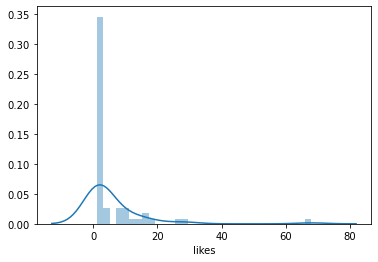

In [8]:
ax = sns.distplot(counts['likes'])
ax

The count of likes by account does not resemble a normal distribution. There are also potential outliers to consider.

As count data, a Poisson distribution may more accurately describe the data.

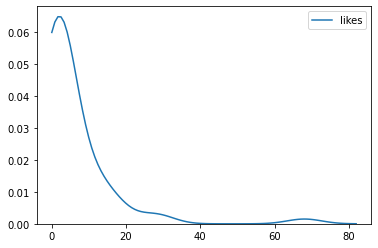

In [9]:
lower, upper = 0, 100
kdeax = sns.kdeplot(counts['likes'], clip = (lower, upper))
kdeax

The <a href="https://en.wikipedia.org/wiki/Poisson_distribution">Poisson distribution</a> with $\lambda = 1$ seems to fit the data, however, the previously mentioned outliers are still present.

#### 3.3 Popular Accounts Visualized
##### 3.3.1 Bar plot

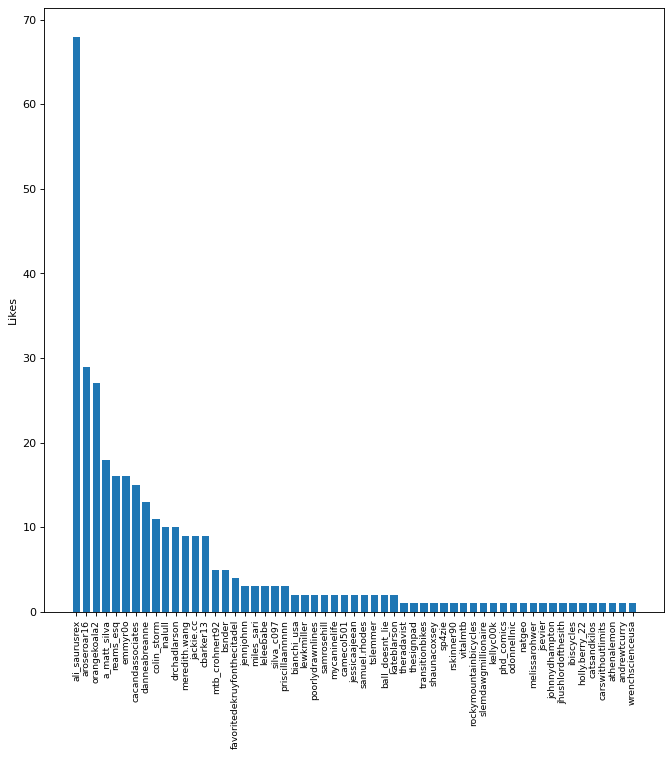

In [10]:
sortcount = counts.sort_values('likes' ,ascending=False)
labels = sortcount['likes'].keys()
vals = sortcount['likes']
width = .75

fig, ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
ax.bar(labels, vals, width)
ax.set_ylabel('Likes')
plt.xticks(rotation=90, fontsize = 'small')
plt.show()

##### 3.3.2 Pie chart
Including all liked accounts makes for an unreadable chart, as shown below.

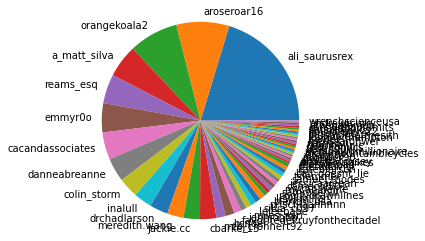

In [13]:
fig2, ax2 = plt.subplots()
ax2.pie(vals, labels = labels)
ax2.axis('equal')
plt.show()

Grouping all accounts with fewer than three likes will emphasize the most frequently liked accounts.

In [49]:
toplikes = sortcount['likes'] > 2
countstop, countsbot = sortcount[toplikes], sortcount[-toplikes]
#other = bottomlikes.sum('likes')
other = countsbot.sum()
pielikes = countstop.append(pd.DataFrame(other['likes'],  columns = ['likes'], index = ['other < 2']))
pielikes

,likes
ali_saurusrex,68
aroseroar16,29
orangekoala2,27
a_matt_silva,18
reams_esq,16
emmyr0o,16
cacandassociates,15
danneabreanne,13
colin_storm,11
inalull,10


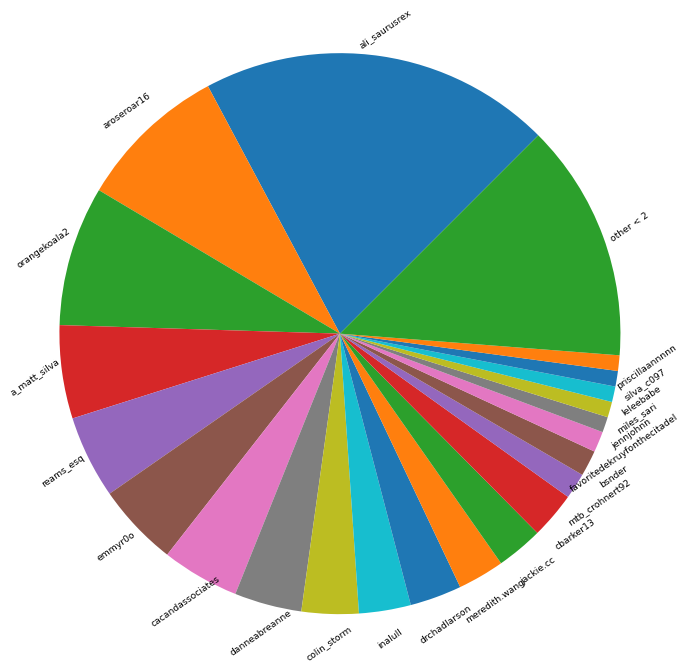

In [74]:
pielabels = pielikes['likes'].keys()
pievals = pielikes['likes']
width = .75

fig3, ax3 = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
ax3.pie(pievals, labels = pielabels, startangle = 45, labeldistance = 1.1, textprops = {'rotation': 35, 'ha': 'center', 'fontsize': 'small'})
ax3.axis('equal')
plt.xticks(rotation = 90)
plt.show()

#### 3.4 Relationships
Although not included in the raw data, the user from which this data originated is able to identify some patterns in their relationship with some of the highest-liked accounts. The top four most liked accounts belong to the user's siblings and spouse. After that, close friends follow while the majority of the accounts with fewer than 2 likes are brands.

### 4. Conclusions
#### 4.1 Findings

#### 4.2 Limitations & Future Steps